## Dataset Information
The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

# 1.Preparing the data and getting the necessary libraries

**1.1 Installing torchmetrics library**

In [395]:
!pip install torchmetrics

**1.2 importing the necessary libraries**

In [396]:
import warnings
warnings.filterwarnings('ignore')
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
import torchmetrics

**1.3 Transforming the data into CSV**

In [397]:
file_paths = [
    "xaa.dat",
    "xab.dat",
    "xac.dat",
    "xad.dat",
    "xae.dat",
    "xaf.dat",
    "xag.dat",
    "xah.dat",
    "xai.dat",
]

headers = [
    "COMPACTNESS", "CIRCULARITY", "DISTANCE_CIRCULARITY", "RADIUS_RATIO",
    "PR.AXIS_ASPECT_RATIO", "MAX.LENGTH_ASPECT_RATIO", "SCATTER_RATIO",
    "ELONGATEDNESS", "PR.AXIS_RECTANGULARITY", "MAX.LENGTH_RECTANGULARITY",
    "SCALED_VARIANCE_MAJOR_AXIS", "SCALED_VARIANCE_MINOR_AXIS",
    "SCALED_RADIUS_OF_GYRATION", "SKEWNESS_MAJOR_AXIS", "SKEWNESS_MINOR_AXIS",
    "KURTOSIS_MINOR_AXIS", "KURTOSIS_MAJOR_AXIS", "HOLLOWS_RATIO", "CLASS_LABEL"
]

merged_data = []
for path in file_paths:
    with open(path, 'r') as file:
        for line in file:
            merged_data.append(line.strip().split())

with open('vehicle_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(headers)
    writer.writerows(merged_data)

df = pd.read_csv('vehicle_data.csv')
df

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR_AXIS,SCALED_VARIANCE_MINOR_AXIS,SCALED_RADIUS_OF_GYRATION,SKEWNESS_MAJOR_AXIS,SKEWNESS_MINOR_AXIS,KURTOSIS_MINOR_AXIS,KURTOSIS_MAJOR_AXIS,HOLLOWS_RATIO,CLASS_LABEL
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


# 2.Exploratory data analysis

**2.1 Checking for any issue in the data types or any missing values**

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   COMPACTNESS                 846 non-null    int64 
 1   CIRCULARITY                 846 non-null    int64 
 2   DISTANCE_CIRCULARITY        846 non-null    int64 
 3   RADIUS_RATIO                846 non-null    int64 
 4   PR.AXIS_ASPECT_RATIO        846 non-null    int64 
 5   MAX.LENGTH_ASPECT_RATIO     846 non-null    int64 
 6   SCATTER_RATIO               846 non-null    int64 
 7   ELONGATEDNESS               846 non-null    int64 
 8   PR.AXIS_RECTANGULARITY      846 non-null    int64 
 9   MAX.LENGTH_RECTANGULARITY   846 non-null    int64 
 10  SCALED_VARIANCE_MAJOR_AXIS  846 non-null    int64 
 11  SCALED_VARIANCE_MINOR_AXIS  846 non-null    int64 
 12  SCALED_RADIUS_OF_GYRATION   846 non-null    int64 
 13  SKEWNESS_MAJOR_AXIS         846 non-null    int64 

**2.2 Checking the variation in the target column**

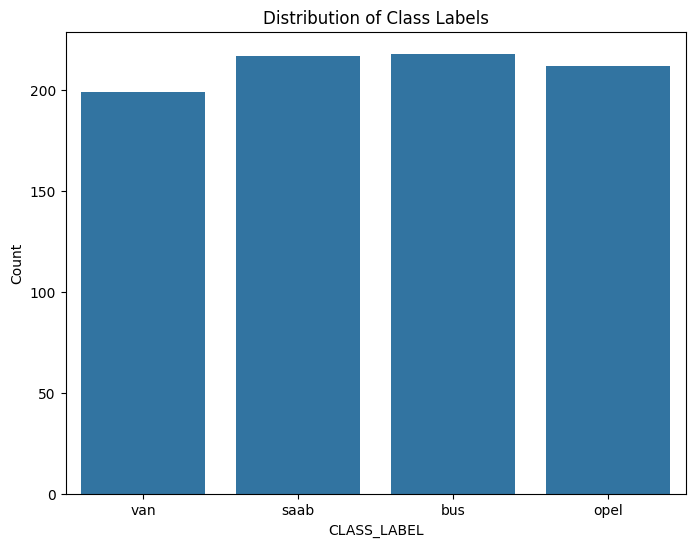

In [356]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['CLASS_LABEL'])
plt.title('Distribution of Class Labels')
plt.ylabel('Count')
plt.show()

**2.3 Statistical summary**

In [357]:
desc = df.describe().T
desc['skew'] = df.iloc[:,:-1].skew()
desc['kurtosis'] = df.iloc[:,:-1].kurtosis()
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
COMPACTNESS,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0,0.381271,-0.535275
CIRCULARITY,846.0,44.861702,6.169866,33.0,40.00,44.0,49.0,59.0,0.262799,-0.924989
DISTANCE_CIRCULARITY,846.0,82.088652,15.771533,40.0,70.00,80.0,98.0,112.0,0.107221,-0.978471
RADIUS_RATIO,846.0,168.940898,33.472183,104.0,141.00,167.0,195.0,333.0,0.390706,0.301825
PR.AXIS_ASPECT_RATIO,846.0,61.693853,7.888251,47.0,57.00,61.0,65.0,138.0,3.821560,29.836240
MAX.LENGTH_ASPECT_RATIO,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0,6.778394,58.375455
SCATTER_RATIO,846.0,168.839243,33.244978,112.0,146.25,157.0,198.0,265.0,0.605779,-0.615868
ELONGATEDNESS,846.0,40.933806,7.811560,26.0,33.00,43.0,46.0,61.0,0.047845,-0.864068
PR.AXIS_RECTANGULARITY,846.0,20.582742,2.592138,17.0,19.00,20.0,23.0,29.0,0.770684,-0.393060
MAX.LENGTH_RECTANGULARITY,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0,0.256359,-0.770098


**2.4 Display the distribution of the skewed features**

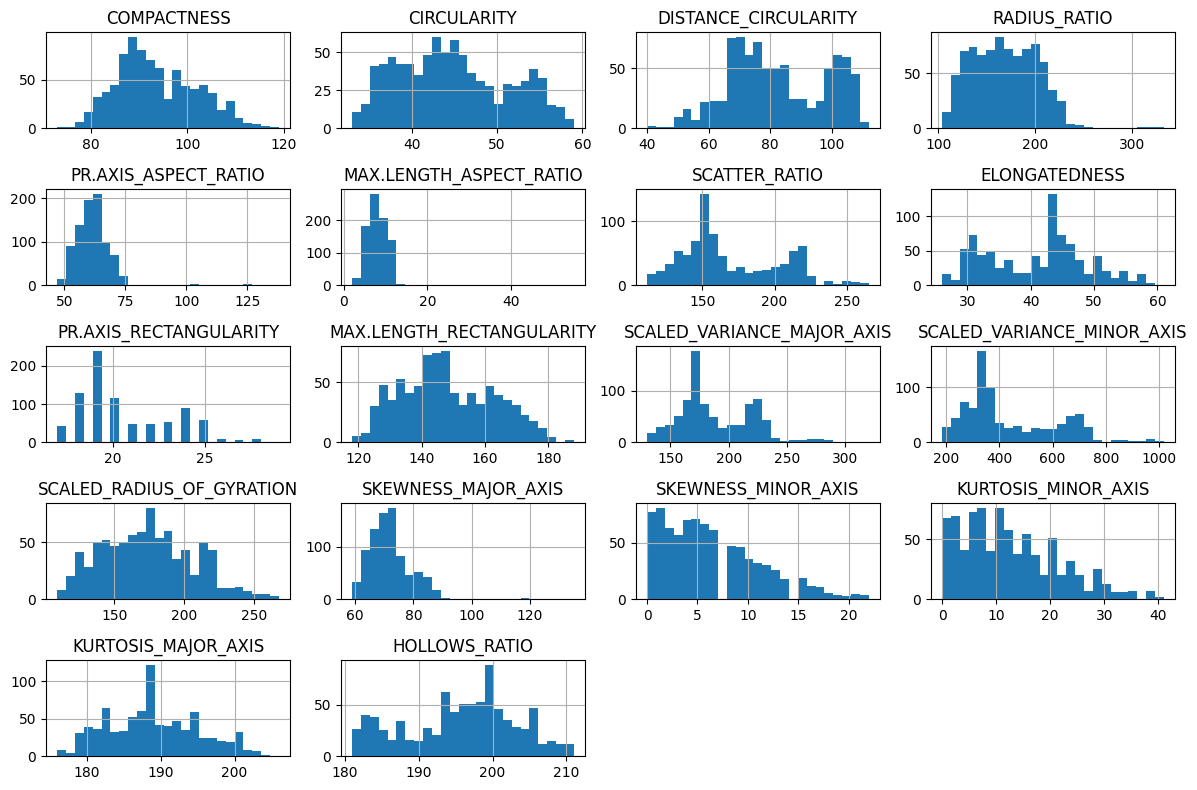

In [358]:
df.hist(bins=25, figsize=(12,8))
plt.tight_layout()
plt.show()

**2.5 Is there's outliers ?**

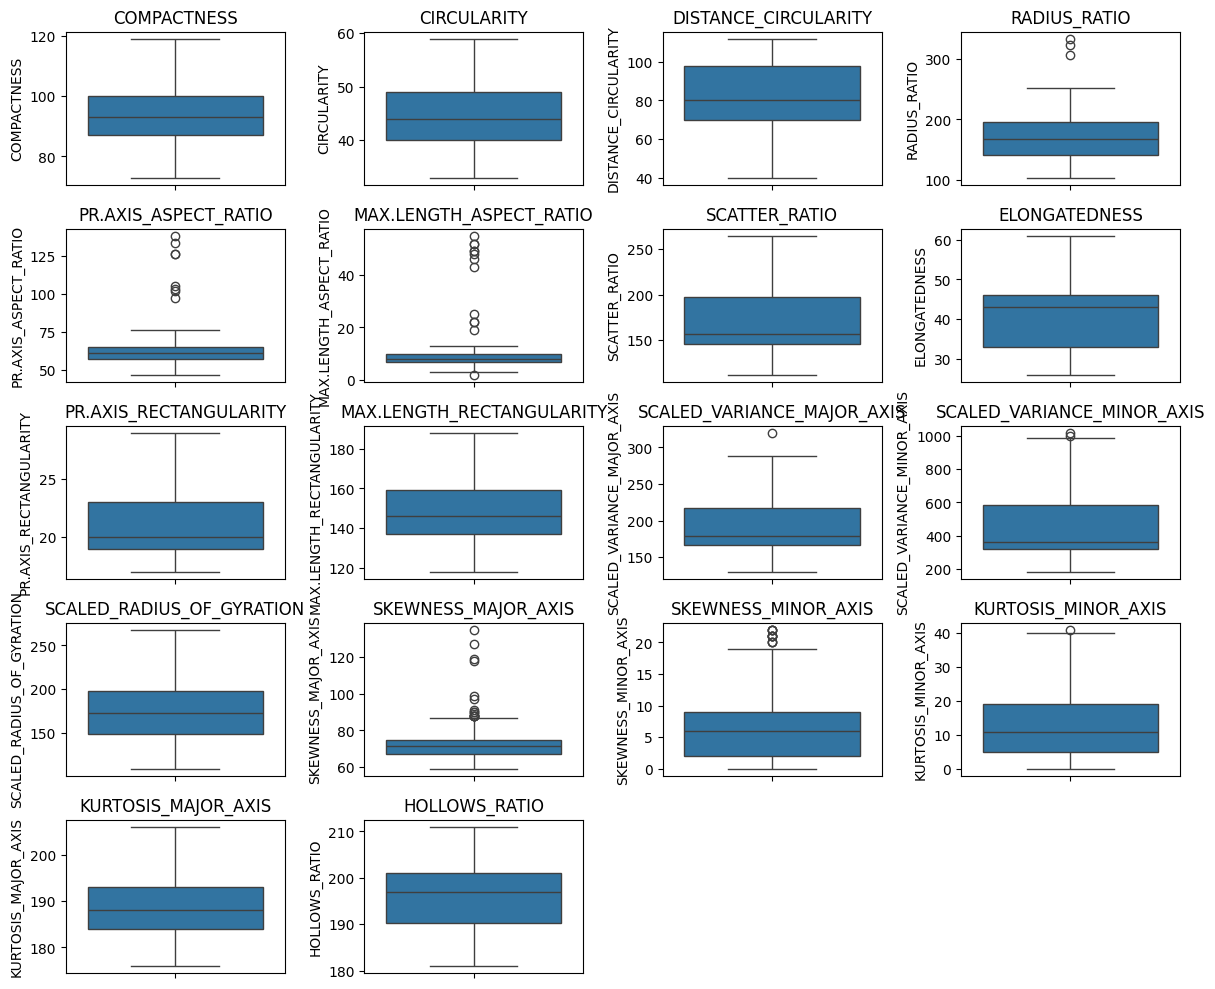

In [359]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


**2.6 Identify highly collinear features**

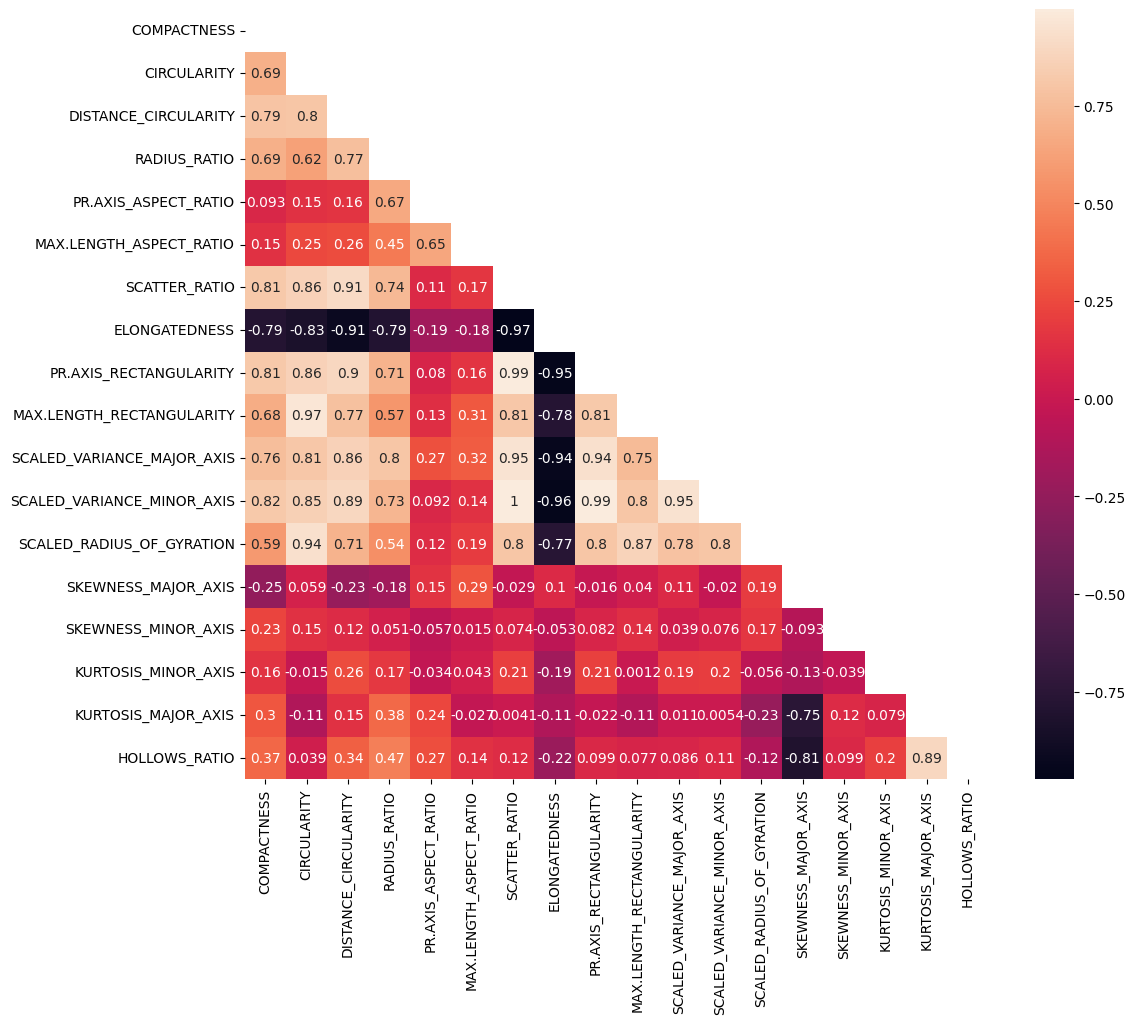

In [360]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=np.triu(correlation_matrix), annot=True)
plt.show()

# 3. Actions


We will:
1.   Remove **highly collinear** features (2.6)
2.   Transform the **Skewed** features (2.3)



3.1 Start with 2.6

In [398]:
df.drop(['ELONGATEDNESS','PR.AXIS_RECTANGULARITY','MAX.LENGTH_RECTANGULARITY'],axis=1,inplace=True)

3.2 now with 2.3

In [399]:
df[['PR.AXIS_ASPECT_RATIO','MAX.LENGTH_ASPECT_RATIO','PR.AXIS_ASPECT_RATIO']].skew()

,0
PR.AXIS_ASPECT_RATIO,3.821560
MAX.LENGTH_ASPECT_RATIO,6.778394
PR.AXIS_ASPECT_RATIO,3.821560


In [400]:
for col in ['PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'PR.AXIS_ASPECT_RATIO']:
  df[col] = np.log1p(df[col])

df[['PR.AXIS_ASPECT_RATIO','MAX.LENGTH_ASPECT_RATIO','PR.AXIS_ASPECT_RATIO']].skew()

,0
PR.AXIS_ASPECT_RATIO,1.548952
MAX.LENGTH_ASPECT_RATIO,1.570454
PR.AXIS_ASPECT_RATIO,1.548952


# 4. Prepare the data to build a model

4.1 Splitting the data into:
*   Training set 70%
*   Validation set 20%
*   Testing set 10%

with Scaling and encoding the features



In [401]:
x = df.drop('CLASS_LABEL',axis=1)
y = df['CLASS_LABEL']

y = LabelEncoder().fit_transform(y)

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

**4.2 To tensor type**

In [402]:
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
x_val = torch.tensor(x_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

**4.3 Here's the trick as we don't have enough data we will force it to be enough by ⚡*OverSampling*⚡**

In [403]:
sampling_strategy = {class_label: count * 50 for class_label, count in zip(*np.unique(y_train.numpy(), return_counts=True))}
oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)

x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train.numpy(), y_train.numpy())

x_train = torch.tensor(x_train_resampled, dtype=torch.float32)
y_train = torch.tensor(y_train_resampled, dtype=torch.long)

In [404]:
x_train.shape

torch.Size([29600, 15])

# 5. Deep Network with PyTorch

**5.1 Define the Neural Network**

In [437]:
class SimpleNN(nn.Module):
  def __init__(self, input_size, num_classes):
    super().__init__()
    self.fc1 = nn.Linear(input_size, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 128)
    self.fc4 = nn.Linear(128, 64)
    self.fc5 = nn.Linear(64, 32)
    self.fc6 = nn.Linear(32, 16)
    self.fc7 = nn.Linear(16, 8)
    self.fc8 = nn.Linear(8, num_classes)
    self.dropout = nn.Dropout(p=0.5)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.relu(self.fc2(x))
    x = self.dropout(x)
    x = self.relu(self.fc3(x))
    x = self.dropout(x)
    x = self.relu(self.fc4(x))
    x = self.relu(self.fc5(x))
    x = self.relu(self.fc6(x))
    x = self.relu(self.fc7(x))
    x = self.fc8(x)
    return x

model = SimpleNN(x_train.shape[1], len(np.unique(y_train)))

**5.2 Define Loss Function and Optimizer**

In [438]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

**5.3 New metric Accuracy !!**

In [439]:
metric = torchmetrics.Accuracy(task="multiclass", num_classes=4)

**5.4 Train and evaluate the Model**

In [443]:
for epoch in range(20):
    # Training Phase
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    train_acc = metric(outputs, y_train)

    # Validation Phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(x_val)
        val_loss = criterion(val_outputs, y_val)
        val_acc = metric(val_outputs, y_val)

    if epoch % 10 == 0:
        print(f"Epoch [{epoch}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f},{'-'*5} Accuracy: {train_acc.item():.4f}, Validation Accuracy: {val_acc.item():.4f}")

Epoch [0], Loss: 0.2069, Validation Loss: 2.4915,----- Accuracy: 0.8964, Validation Accuracy: 0.8819
Epoch [10], Loss: 0.1730, Validation Loss: 2.6139,----- Accuracy: 0.9133, Validation Accuracy: 0.8740


**5.4 Test the model**

In [446]:
with torch.no_grad():
    outputs = model(x_test)
    predictions = torch.argmax(outputs, axis=1)
    accuracy = metric(predictions, y_test)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 90.55%
